# The Rowland geometry for Arcus

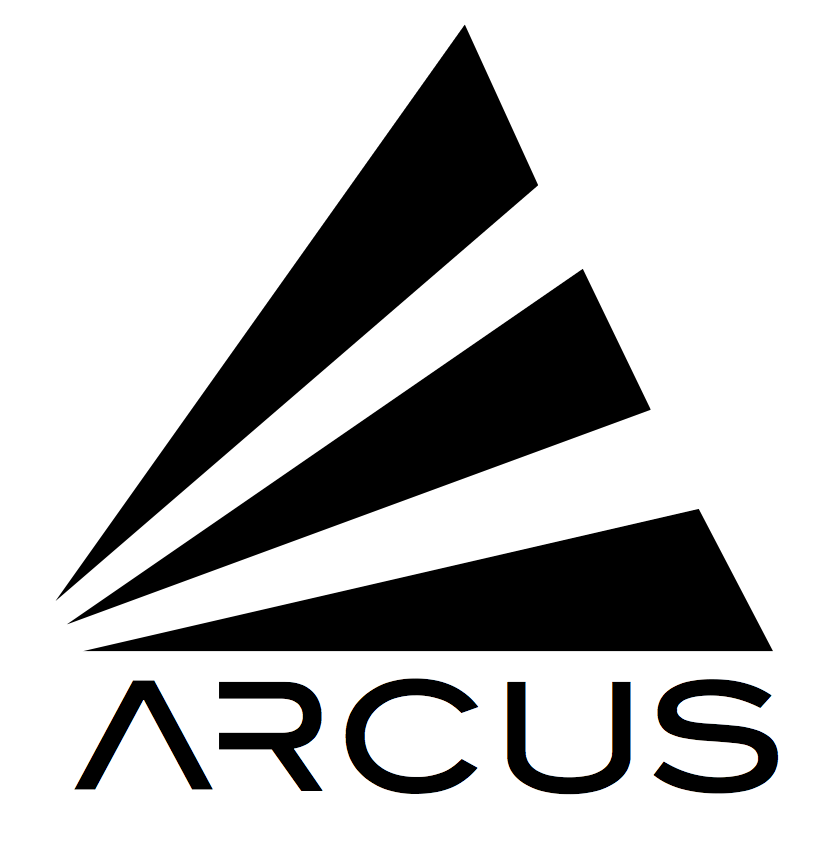

### Revision status: *early DRAFT*
file: RowlandGeometry.ipynb not found in repository (path missing or new file not yet commited?).
        No versioning information can be displayed.

This document is git version controlled. The repository is available at https://github.com/hamogu/arcus.
See git commit log for full revision history.

Code was last run with:

- MARXS ray-trace code version 1.2.dev606 (commit hash: 259ba4b6cc from 2017-09-01)
- ARCUS python code version 0.0.dev88 (commit hash: f4bf10dc12 from 2017-09-02)
- ARCUS CALDB version hash: 6e6eed8 (commited on 2017-08-30 )


In [1]:
from nbtemplate import display_header
display_header('RowlandGeometry.ipynb', status='early DRAFT')

## Purpose

The purpose for this document is to lay out the mathematical formulas and the numerical values chosen for the Rowland tori in Arcus. It will describe some of the motivations and derivation to arrive at these numbers, but that description is not necessarily sufficient to derive a unique solution. Tables for parameters for each Rowland torus and examples how to derive positions and orientations for CAT gratings and CCD detectors that are placed on these tori  are given.

**The Rowland geometry is the cornerstone of the Arcus optical design. Any change in the parameters, however minor, needs to be propagated to many different working groups and studies immediately.**

## Introduction

The Arcus mission provides high-resolution X-ray spectroscopy coupled with unprecedented effective area. Incoming X-rays are focussed using Silicon Pore Optics (SPOs) that are developed in the context of the Athena mission. The area under the SPOs is covered by critical angle transmission (CAT) gratings which disperse the light onto a strip of CCD detectors. In order to achieve the best possible spectral resolving power at all detected grating orders, the CAT gratings need to be mounted on the surface of a torus, called the Rowland-torus. (Note that the gratings are not tangential to the torus. Their orientation is discussed in detail below.) At the same time, the CCDs are tangential to the "other side" of the same torus. We first discuss the traditional Rowland torus design as it is employed in e.g. the Chandra/HETGS and then detail the modifications for Arcus, where the axis of the torus is tilted with respect to the optical axis. Also, Arcus employs more than one torus, and those tori are partially overlapping.


## The traditional torus geometry
Fill in the following stuff here:
optical axis perpendicular to torus symmetry, references to rowland papers, canizares 2005 etc.

## Equations to describe a torus

There are several different ways to describe a torus mathematically. Different expressions have different advantages and disadvantages for particular use cases. For example, the parametric torus equation lends itself well to triangulate the surface of the torus for visualization, but the quartic form is more useful to numerically solve for the intersection points between the torus and a ray in ray-tracing.

We use the following conventions: $r$ determines the radius of the Rowland
circle, $R$ is the distance from the center of the circle to the symmetry axis of the torus. If $r < R$, the torus has an inner hole like a doughnut, and if $r > R$ the inner parts of the torus overlap with each other.

### The torus
The following quartic equation describes a torus where the y-axis is the symmetry axis. The roots of this equation are the (x,y,z) coordinates of points on the surface of the torus:

$$(x^2 + y^2 + z^2 + R^2 - r^2)^2 = 4 R^2 (x^2 + z^2)\ \ .(1)$$

This equation becomes very unwieldy if the symmetry axis does not coincide with one of the axes of the coordinate system. 

Another way to express coordinates is to parameterize them by two angles, $\theta$, which describes points on the Rowland circle with radius $r$, and $\varphi$, which rotates this circle around the axis of symmetry:

$$\begin{pmatrix}x\\y\\z\\ \end{pmatrix} = \begin{pmatrix}(R + r \cos{\theta}) \cos\varphi\\
r \sin\theta\\(R + r \cos{\theta}) \sin\varphi\\ \end{pmatrix}\ \ (2)$$

Unlike the quartic given before, this equation can be generalized with reasonable effort to tori where the center $\vec c$ does not coincide with the origin of the coordinate system and the axis of symmetry is not parallel to one of the axes of the coordinate system. The axis of symmetry is given by a unit vector $\vec e_y$. We define a vector $\vec e_R(\varphi) = \vec e_x \cos\varphi + \vec e_z \sin\varphi$ and can now write a generalized torus equation for points $\vec p$:

$$\vec p(\varphi, \theta) = \vec c + R \; \vec e_R(\varphi) + r \; (\vec e_y \sin \theta + \vec e_R(\varphi) \cos \theta)\ \ . (3)$$

For a torus that is translated and rotated with respect to the coordinate system, we only need to rotate the $\vec e_x$, $\vec e_y$, and $\vec e_z$ and specify $\vec c$. The table below will do just that. Alternatively, the points on the torus can be calculated using the original coordinate system using either equation (1) or (2) and then be transformed into the new coordinate system. 

### Homogeneous coordinates
We write coordinate transformation in [homogeneous coordinates](https://en.wikipedia.org/wiki/Homogeneous_coordinates). This is a well known concept in geometry and computer vision and described in standard textbooks. In short, points and vectors (x,y,z) are written in homogeneous coordinates as ($x_h$, $y_h$, $z_h$, $w_h$). $w_h$ is a kind of scale factor. For a point in 3-d space $x = x_h / w_h$, $y = y_h / w_h$, and $z = z_h / w_h$. Vectors in 3-d space (directions) are expressed as points at infinity, i.e. $w_h = 0$. The advantage of homogeneous coordinates is that the transformation between two coordinate systems can be written as a simple $4\times 4$ matrix, which contains both translations and rotations and that multiple coordinate transformations can be chained by just multiplying their transformation matrices together. Below, we give the transformation matrices to transform our canonical torus (origin at (0, 0, 0) and y-axis as symmetry axis) into the Rowland torus for each channel.

### Coordinate system

The coordinate systems for Arcus have not been formally fully specified yet; when the Arcus project adopts a standardized set of coordinate systems, the tables in this memo will be updated.

In the meantime, we adopt the following definitions: Every optical channel has an optical channel coordinate system (OCCS) associated with it. The origin of this coordinate system is at the nominal focal point for this system. The $z$-axis coincides with the optical axis, such that astronomical sources are located at $z=+\infty$. The positive x-axis is the direction of dispersion.

The scale for all axes is in millimeters.

Arcus has four petals with SPOs arranged in two pairs. The two petals of each pair share an optical axis and produce a common trace on the detectors.
(A design option that still can be investigated in the future is to introduce a small offset in cross-dispersion direction between the two petals in a pair. That is easy to implement -just shift the entire petal a little- and reduces the risk of petal to petal alignment issues.) Since the two petals in each pair share an optical axis, they also share a Rowland Torus. The following table lists the parameters for each of the two tori.

In [2]:
from IPython.display import Markdown, HTML
import numpy as np
from arcus.arcus import defaultconf

In [7]:
from marxs.math.utils import h2e

def format_rowland_pos4d(rowland, shift=np.eye(4)):
    '''Format coordinates for one Rowland torus for printing.
    
    Parameters
    ----------
    rowland : marxs.design.rowland.RowlandTorus
        Roland torus in Arcus with a ``pos4d`` matrix in global coordinates.
        
    shift : np.array or shape (4,4)
        transformation matrix to transform the global coordinate system to the system used for output.
    '''
    out = {}
    pos4d = np.dot(shift, rowland.pos4d)
    out['pos4d'] = pos4d
    out['ex'] = h2e(np.dot(pos4d, [1, 0, 0, 0]))
    out['ey'] = h2e(np.dot(pos4d, [0, 1, 0, 0]))
    out['ez'] = h2e(np.dot(pos4d, [0, 0, 1, 0]))
    out['center'] = h2e(pos4d[:, 3])
    return out

def pos4dformat(a):
    'Print precision differs for different columns'
    out = '\\begin{pmatrix}\n'
    for i in range(4):
        out = out + '{:6.4g} & {:6.4g} & {:6.4g} & {:6.2f}\\\\ \n'.format(a[i,0], a[i,1], a[i,2], a[i,3])
    out = out + '\\end{pmatrix}\n'
    return out

def mat3format(a):
    'Similar to pos4dformat'
    out = '\\begin{pmatrix}\n'
    for i in range(3):
        out = out + '{:6.4g} & {:6.4g} & {:6.4g}\\\\ \n'.format(a[i,0], a[i,1], a[i,2])
    out = out + '\\end{pmatrix}\n'
    return out

def vecformat(a, format='6.2f'):
    out = '\\begin{pmatrix}\n'
    formstring = '{:' + format + '}\\\\ \n'
    for i in range(3):
        out = out + formstring.format(a[i])
    out = out + '\\end{pmatrix}\n'
    return out    

In [14]:
rowlands = [defaultconf['rowland'], defaultconf['rowlandm'], 
            # defaultconf['rowland_central']
           ]
shifts = [np.linalg.inv(defaultconf['shift_optical_axis_1']),
          np.linalg.inv(defaultconf['shift_optical_axis_2']),
          #np.linalg.inv(defaultconf['shift_optical_axis_1'])
         ]

labels = ['1', '2', 'CCDs']

tablehead = r'''
 <table style="width:100%">
  <tr>
    <th>petal pair</th>
    <th>R [in mm]</th>
    <th>r [in mm]</th>
    <th>matrix for homogeneous coordinates</th>
    <th>$\vec c$</th>
    <th>$\vec e_x$</th>
    <th>$\vec e_y$</th>
    <th>$\vec e_z$</th>
  </tr>
'''

tablefoot = '''
</table> 
'''
table = tablehead

for i in range(len(rowlands)):
    temp = format_rowland_pos4d(rowlands[i], shifts[i])
    tablevals = [labels[i], 
                 '{:8.2f}'.format(rowlands[i].R), 
                 '{:8.2f}'.format(rowlands[i].r)]
    tablevals.append(pos4dformat(temp['pos4d']))
    for n in ['center', 'ex', 'ey', 'ez']:
        tablevals.append(vecformat(temp[n], '7.5g'))
    td = ['<td>{}</td>\n'.format(n) for n in tablevals]
    
    table = table + '''
    <tr>
      {}
    </tr>
    '''.format(''.join(td))
    
table = table + tablefoot

In [15]:
HTML(table)

petal pair,R [in mm],r [in mm],matrix for homogeneous coordinates,$\vec c$,$\vec e_x$,$\vec e_y$,$\vec e_z$
1,5901.97,5966.04,\begin{pmatrix} -0.07327 & 0.9973 & 0 & 869.60\\ 0 & 0 & 1 & 0.00\\ 0.9973 & 0.07327 & 0 & 63.89\\ 0 & 0 & 0 & 1.00\\ \end{pmatrix},\begin{pmatrix} 869.6\\ 0\\ 63.89\\ \end{pmatrix},\begin{pmatrix} -0.073273\\ 0\\ 0.99731\\ \end{pmatrix},\begin{pmatrix} 0.99731\\ 0\\ 0.073273\\ \end{pmatrix},\begin{pmatrix} 0\\ 1\\ 0\\ \end{pmatrix}
2,5901.97,5966.04,\begin{pmatrix} -0.07327 & -0.9973 & 0 & -869.60\\ 0 & 0 & 1 & 0.00\\ -0.9973 & 0.07327 & 0 & 63.89\\ 0 & 0 & 0 & 1.00\\ \end{pmatrix},\begin{pmatrix} -869.6\\ 0\\ 63.89\\ \end{pmatrix},\begin{pmatrix} -0.073273\\ 0\\ -0.99731\\ \end{pmatrix},\begin{pmatrix} -0.99731\\ 0\\ 0.073273\\ \end{pmatrix},\begin{pmatrix} 0\\ 1\\ 0\\ \end{pmatrix}


There is further symmetry between the two Rowland tori. By design, the tori have the same $r$ and $R$, which allows them to overlap in one specific plane. The CCD detectors are placed in this plane, making it possible to use the same CCDs to read out the signal from both tori and place the CCDs in the spectroscopic focus for both tori simultaneously. To make the overlap work, both tori are tilted by the same amount, but in opposite directions, which leads to homogenous matrices that are identical except for the signs.

Last, it is easy to see that the transformation matrix is composed of $\vec e_x$, $\vec e_y$, $\vec e_z$, and $\vec c$. These vectors are just written separately here again to remind the reader that a transformation matrix can be constructed by listing the transformed bases coordinates.

## Placing grating facets on the torus

The equations of the Rowland torus tell us *where* to place the CAT gratings, but not which *orientation* they should have. For now, let us assume that we place the center of the grating exactly on the Rowland torus. Since the grating is flat, that means that most of the grating surface is either above or below the Rowland torus. Naively, one might think that a better place would be to move the grating slightly inward, but this is not as simple as it sounds, because usually the gratings are not tangential to the Rowland torus, but have a different orientation, which we will now explain.

### General prescription for blazed gratings

In a Rowland geometry with traditional transmission gratings the grating surface shall be perpendicular to the incoming rays. The exact impact of other orientations on the performance of the instrument can be simulated with ray-trace simulations. The most important effects typically are a drop in grating efficiency (and thus the effective area) for non-normal incidence and a decrease in spectral resolution when the the grating bars are not perpendicular to the intended dispersion direction.
Thus, we want the surface normal vector for a grating at position $\vec p$ to be $$\vec n = \frac{\vec p}{|\vec p|}$$ in the OCCS because all rays point to the focal point, which is located at the origin of the coordinate system. We note that the position directly on the optical axis is the only position where the direction $\vec n$ is also normal to the surface of the Rowland torus. In general, $\vec n$ is tilted with respect to the torus surface.

Specifying the normal to the surface still leaves one degree of freedom: rotation around the normal $\vec n$. We fix this by requiring that the direction of the grating bars $\vec e_\mathrm{bar}$ is perpendicular to the diffraction direction, which is $\vec e_x$ in our coordinate system: $$\vec e_\mathrm{bar} \times \vec e_x = \vec 0\ \ .$$

In [ ]:
Markdown('''
For CAT gratings, the optimal incidence angle is not exactly normal to the grating surface. 
Thus, CAT grating need to be rotated around $\\vec e_\\mathrm{{bar}}$ by the blaze angle.
For the gratings used in Arucs, that blaze angle is +/-{:4.2f} degrees.'''.format(defaultconf['blazeang']))

The sign of the blaze angle determines to which side the grating blazes. $\vec n$ is parallel to the walls of the grating bars. At the critical angle, photons reflect off this wall. The following sketch illustrates this concept.

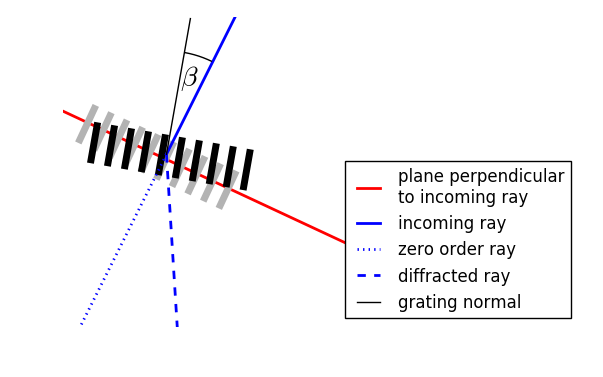

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, aspect='equal')
    
l = 20
d = 10
alpha = np.deg2rad(100)
step = np.arange(20, 120, d)
x = 100 + np.sin(alpha) * step
y = 340 + np.cos(alpha) * step
x1 = x + l * np.sin(alpha + np.pi/2)
y1 = y + l * np.cos(alpha + np.pi/2)

linerange = np.array([-100, 200])
gamma = np.deg2rad(115)
ax.plot(100 + np.sin(gamma) * linerange, 
        345 + np.cos(gamma) * linerange,'r', lw=2, label='plane perpendicular\nto incoming ray')

# Light gray bars for traditional transmission grating
xt = 100 + np.sin(gamma) * step
yt = 355 + np.cos(gamma) * step
x1t = xt + l * np.sin(gamma + np.pi/2)
y1t = yt + l * np.cos(gamma + np.pi/2)
ax.plot(np.vstack([xt, x1t]), np.vstack([yt, y1t]), '0.7', lw=5) #, label='normal grating')


ax.plot(np.vstack([x, x1]), np.vstack([y, y1]), 'k', lw=5) #, label='CAT grating')
ax.plot([200, 160], [400, 320], 'b', lw=2, label='incoming ray')
ax.plot([160, 0], [320, 0], ls=':', color='b', lw=2, label='zero order ray')
ax.plot([160, 180], [320, 0], ls='--', color='b', lw=2, label='diffracted ray')
ax.plot([160, 160 + np.sin(alpha - np.pi / 2) * 80], 
        [320, 320 + np.cos(alpha - np.pi / 2) * 80], 'k', label='grating normal')
phi = np.arange(0.18, .45, .001)
ax.plot(160 + np.sin(phi) * 60, 
        320 + np.cos(phi) * 60, 'k')
ax.text(168, 360, r'$\beta$', size=20)
ax.set_ylim(220, 400)
ax.set_xlim(100, 400)
ax.set_ylabel('Optical axis')
ax.legend(loc='lower right')
ax.set_axis_off()
out = ax.set_xlabel('Dispersion direction')

In this plot, the solid blue line is the path of the incoming photon. The red line is perpendicular to the incoming photon and would be the normal of a traditional transmission grating (gray grating bars). Instead, the CAT grating is blazed by the angle $\beta$ which makes photons "bounce off" the walls of the grating bars (thick black lines) and all the dispersed signal ends up towards the right of the zeroth order. If instead, the blaze angle was $-\beta$, photons would "bounce off" the other side of the grating bars and would be blazed towards a location to the left of the zeroth order.

### Example

Finally, we can put all these pieces together and derive a grating position and orientation for a single grating as an example. The purpose of this example is two-fold. First, it illustrates the steps listed above with some concrete numbers and second, it provides a cross-check for any independent implementation of this algorithm. The numbers given in the following are derived using the same functions and methods that power the ray-traces of Arcus. Detailed analysis of the ray-traces has not revealed any systematic error in the location and width of dispersed orders, so any deviation to these reference numbers should be investigated carefully.

In [17]:
# Make a Rowland torus with the properties in the table above
# rowland[0] is very similar, but in global coordinates.
# To display the example here if would be nice not have to do that coordiante transformation all the time.
from marxs.design import RowlandTorus
rowland = RowlandTorus(R=rowlands[0].R, r=rowlands[0].r, pos4d=np.dot(shifts[0], rowlands[0].pos4d))

In [18]:
from marxs.optics import FlatOpticalElement
from arcus.ralfgrating import RectangularGrid
from transforms3d import axangles

blazemat = axangles.axangle2mat(np.array([0, 1, 0]), np.deg2rad(-defaultconf['blazeang']))

grid = RectangularGrid(rowland=rowland, 
                       y_range=[500, 520], x_range=[100, 120], z_range=[1e4, 1.4e4],
                       d_element=20, elem_class=FlatOpticalElement,
                       elem_args={'orientation': blazemat},
                       normal_spec=np.array([0, 0, 0., 1.]))
# copy of the line above without the blaze
gridnoblaze = RectangularGrid(rowland=rowland, 
                       y_range=[500, 520], x_range=[100, 120], z_range=[1e4, 1.4e4],
                       d_element=20, elem_class=FlatOpticalElement,
                       normal_spec=np.array([0, 0, 0., 1.]))
pos = grid.elem_pos[0]
elem=grid.elements[0]

In [23]:
text = r'''Let's assume that we look at a drawing of the distribution of SPOs and 
decide that $x = {x}$ and $y={y}$ would be a good location for a CAT grating. 
We need to determine the $z$ value by looking at the Rowland torus. 
There might be up to four points on the torus that match $x$ and $y$, but we know that we 
are looking for the solution that is closest to the SPOs. The value of $z$ should be about one focal length 
from the origin of the coordinate system.
Several approaches are possible. For example, we can take eqn (3) and the parameters given in the 
table and solve numerically for $\varphi$ and $\theta$ values that return the requested $x$ and $y$ and 
then calculate $z$. 
'''.format(x=pos[0, 3], y=pos[1, 3])
text = text + r'''Another way is to describe this problem as a line in the form
$$g=\begin{pmatrix}x\\y\\0\end{pmatrix} + k \begin{pmatrix}0\\0\\1\end{pmatrix}\ \ .$$
The two vectors can be written in homogeneous coordinates and transformed into the natural coordinate system of the
torus using the inverse of the 4d matrix in the table above. 
We can then solve eqn (1) to find $z$, which we transform back into the 
original coordinate system. This is what the MARXS software does internally. '''
text  = text + 'In either case, the resulting value should be $z={z:8.2f}$.'.format(z=pos[2, 3])
Markdown(text)

Let's assume that we look at a drawing of the distribution of SPOs and 
decide that $x = 110.0$ and $y=510.0$ would be a good location for a CAT grating. 
We need to determine the $z$ value by looking at the Rowland torus. 
There might be up to four points on the torus that match $x$ and $y$, but we know that we 
are looking for the solution that is closest to the SPOs. The value of $z$ should be about one focal length 
from the origin of the coordinate system.
Several approaches are possible. For example, we can take eqn (3) and the parameters given in the 
table and solve numerically for $\varphi$ and $\theta$ values that return the requested $x$ and $y$ and 
then calculate $z$. 
Another way is to describe this problem as a line in the form
$$g=\begin{pmatrix}x\\y\\0\end{pmatrix} + k \begin{pmatrix}0\\0\\1\end{pmatrix}\ \ .$$
The two vectors can be written in homogeneous coordinates and transformed into the natural coordinate system of the
torus using the inverse of the 4d matrix in the table above. 
We can then solve eqn (1) to find $z$, which we transform back into the 
original coordinate system. This is what the MARXS software does internally. In either case, the resulting value should be $z=11896.08$.

In [26]:
import transforms3d

def vecflat(vec):
    strs = ['{:8.5g}'.format(f) for f in vec]
    return '({})'.format(', '.join(strs))

vec = pos[:, 3]
vec[3] = 0
text = '''
The vector from point ${0}$ to the focal point is obviously ${1}$ in our coordinate system.
Normalizing to unit lenght yields ${2}$. 
'''.format(vecflat(pos[:3, 3]), vecflat(vec[:3]), vecflat(vec[:3] / np.sqrt((vec**2).sum())))
text = text + '''Now we need to choose the rotation such that the 
direction of the grooves is perpendicular to $\\vec e_x$, which gives $\\vec e_\mathrm{{groove}}={0}$ and finally we rotate the direction
vector above by the blaze angle around the groove direction to obtain the surface normal $\\vec n$
of the CAT grating:'''.format(vecflat(grid.elements[0].geometry('e_y')[:3]))
rot = transforms3d.axangles.axangle2mat(gridnoblaze.elements[0].geometry('e_y')[:3], 
                                        np.deg2rad(-defaultconf['blazeang']))

text = text + r''' $$\vec n = {0} {1} = {2}$$'''.format(mat3format(rot), 
                                         vecformat(gridnoblaze.elements[0].geometry('e_x')[:3], '6.4f'),
                                         vecformat(grid.elements[0].geometry('e_x')[:3], '6.4f'))
Markdown(text)


The vector from point $(     110,      510,    11896)$ to the focal point is obviously $(     110,      510,    11896)$ in our coordinate system.
Normalizing to unit lenght yields $(0.0092379,  0.04283,  0.99904)$. 
Now we need to choose the rotation such that the 
direction of the grooves is perpendicular to $\vec e_x$, which gives $\vec e_\mathrm{groove}=(-0.21064, -0.97658, 0.043815)$ and finally we rotate the direction
vector above by the blaze angle around the groove direction to obtain the surface normal $\vec n$
of the CAT grating: $$\vec n = \begin{pmatrix}
0.9995 & 0.001575 & 0.03254\\ 
-0.001346 &      1 & -0.007044\\ 
-0.03255 & 0.006997 & 0.9994\\ 
\end{pmatrix}
 \begin{pmatrix}
0.0092\\ 
0.0428\\ 
0.9990\\ 
\end{pmatrix}
 = \begin{pmatrix}
0.0418\\ 
0.0358\\ 
0.9985\\ 
\end{pmatrix}
$$

## Placing CCD detectors

Add text here